## Step 1: Load the Preprocessed Dataset

We begin by loading the cleaned and scaled dataset, prepared during EDA.

In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('../data/processed/cleaned_data.csv')
df.head()


,Age,Gender,Temperature (C),Humidity,Wind Speed (km/h),nausea,joint_pain,abdominal_pain,high_fever,chills,...,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache,prognosis
0,0.030303,1,0.729691,0.586755,0.264610,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Heart Attack
1,0.545455,0,0.654889,0.364238,0.486594,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Influenza
2,0.444444,0,0.515404,0.709272,0.136890,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Influenza
3,0.050505,0,0.933323,0.380132,0.575202,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Dengue
4,0.696970,0,0.593129,0.793377,0.572230,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Sinusitis


## Step 2: Convert Dataset to Transaction Format

We select binary symptom features and convert them into a format suitable for frequent pattern mining.

In [8]:
# Drop non-binary columns
exclude_cols = ['prognosis', 'Age', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Gender']
symptom_df = df.drop(columns=exclude_cols, errors='ignore')

print(f"Columns after dropping non-binary: {symptom_df.columns.tolist()}")

# Convert values to boolean (True/False) as required by mlxtend
symptom_df = symptom_df.astype(bool)

symptom_df.head()


Columns after dropping non-binary: ['nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills', 'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness', 'headache', 'chest_pain', 'vomiting', 'cough', 'shivering', 'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids', 'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache', 'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat', 'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate', 'swollen_glands', 'rashes', 'sinus_headache', 'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste', 'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion', 'back_pain', 'knee_ache']


,nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,...,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
0,True,False,False,False,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,True,True,False,False,False,False,False,False,False,False


## Step 3: Run FP-Growth to Find Frequent Symptom Sets

We use the FP-Growth algorithm from `mlxtend` to find frequent combinations of symptoms.

In [30]:
from mlxtend.frequent_patterns import fpgrowth

# Minimum support threshold (adjust if needed)
min_support = 0.01  # means 5% of all patients

frequent_itemsets = fpgrowth(symptom_df, min_support=min_support, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head(10)


,support,itemsets
12,0.261594,(hiv_aids)
20,0.240715,(headache)
19,0.207589,(vomiting)
13,0.168440,(chest_pain)
0,0.152981,(nausea)
14,0.139129,(high_blood_pressure)
92,0.139129,"(high_blood_pressure, chest_pain)"
93,0.133507,"(hiv_aids, high_blood_pressure)"
91,0.133507,"(hiv_aids, chest_pain)"
94,0.133507,"(hiv_aids, high_blood_pressure, chest_pain)"


## Step 4: Generate Association Rules

We generate rules in the form {symptom A, symptom B} → {symptom C}, and measure their confidence, lift, etc.


In [31]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)
rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
77,"(confusion, dizziness, nausea)",(rapid_heart_rate),0.015860,0.035736,0.010640,0.670886,18.773503,1.0,0.010074,2.929880,0.961991,0.259804,0.658689,0.484319
93,"(severe_headache, trouble_seeing)",(weakness),0.021281,0.036740,0.013652,0.641509,17.460975,1.0,0.012870,2.686990,0.963228,0.307692,0.627836,0.506547
69,"(confusion, nausea)",(rapid_heart_rate),0.024694,0.035736,0.015057,0.609756,17.062894,1.0,0.014175,2.470927,0.965228,0.331858,0.595294,0.515552
83,"(dizziness, high_fever)",(rapid_heart_rate),0.020679,0.035736,0.012447,0.601942,16.844224,1.0,0.011708,2.422420,0.960494,0.283105,0.587190,0.475128
63,(back_pain),(knee_ache),0.035535,0.038346,0.022285,0.627119,16.354335,1.0,0.020922,2.578982,0.973446,0.431907,0.612250,0.604135
91,(weakness),(trouble_seeing),0.036740,0.038145,0.022485,0.612022,16.044636,1.0,0.021084,2.479148,0.973438,0.429119,0.596636,0.600748
92,"(severe_headache, weakness)",(trouble_seeing),0.022686,0.038145,0.013652,0.601770,15.775873,1.0,0.012787,2.415325,0.958353,0.289362,0.585977,0.479832
39,"(dizziness, high_fever, nausea)",(confusion),0.012447,0.067055,0.010038,0.806452,12.026753,1.0,0.009203,4.820217,0.928408,0.144509,0.792540,0.478076
78,"(rapid_heart_rate, dizziness, nausea)",(confusion),0.013853,0.067055,0.010640,0.768116,11.455046,1.0,0.009712,4.023326,0.925523,0.151429,0.751449,0.463399
86,"(runny_nose, fever)",(sore_throat),0.018069,0.064445,0.012247,0.677778,10.517169,1.0,0.011082,2.903447,0.921569,0.174286,0.655582,0.433904


## Step 5: One-Hot Encode the `prognosis` Column

To discover association rules between symptoms and diagnoses, we one-hot encode the `prognosis` column and include it in the transactions.

In [32]:
# One-hot encode prognosis column
prognosis_ohe = pd.get_dummies(df['prognosis'], prefix='prognosis')

# Combine with symptom data
transactions_df = pd.concat([symptom_df, prognosis_ohe], axis=1)
transactions_df = transactions_df.astype(bool)

transactions_df.head()


,nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,...,prognosis_Common Cold,prognosis_Dengue,prognosis_Eczema,prognosis_Heart Attack,prognosis_Heat Stroke,prognosis_Influenza,prognosis_Malaria,prognosis_Migraine,prognosis_Sinusitis,prognosis_Stroke
0,True,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,True,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,True,False,False,True,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


## Step 6: Run FP-Growth with Prognosis Labels

We now rerun the FP-Growth algorithm on the expanded transaction set (symptoms + diagnosis labels).

In [33]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets = fpgrowth(transactions_df, min_support=min_support, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False).head()


,support,itemsets
16,0.261594,(hiv_aids)
28,0.240715,(headache)
26,0.207589,(vomiting)
0,0.194338,(prognosis_Heart Attack)
27,0.180084,(prognosis_Migraine)


## Step 7: Generate Symptom-to-Diagnosis Rules

We generate association rules and filter for those where the **consequent is a disease** (i.e., `prognosis_X`).

In [40]:
from mlxtend.frequent_patterns import association_rules

# Generate rules
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.6)

# Define helper function: all consequents must be prognosis_X
def is_diagnosis_only(consequents):
    return all(str(item).startswith('prognosis_') for item in consequents)

# Apply strict filtering
disease_rules = rules[rules['consequents'].apply(is_diagnosis_only)]

#View unique prognosis labels
unique_prognoses = df['prognosis'].unique()
print(f"Unique prognosis labels: {unique_prognoses}")

# Extract all unique prognosis labels from disease_rules['consequents']
prognoses_in_rules = set()

for consequent in disease_rules['consequents']:
    for item in consequent:
        if str(item).startswith('prognosis_'):
            prognoses_in_rules.add(item.replace('prognosis_', ''))

# Print the sorted list
print("📋 Prognosis labels found in disease_rules:")
print(sorted(prognoses_in_rules))

# View top rules
disease_rules.sort_values(by='lift', ascending=False).head(10)



Unique prognosis labels: ['Heart Attack' 'Influenza' 'Dengue' 'Sinusitis' 'Eczema' 'Common Cold'
 'Heat Stroke' 'Migraine' 'Malaria' 'Arthritis' 'Stroke']
📋 Prognosis labels found in disease_rules:
['Arthritis', 'Common Cold', 'Dengue', 'Eczema', 'Heart Attack', 'Heat Stroke', 'Influenza', 'Malaria', 'Migraine', 'Sinusitis', 'Stroke']


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
43,"(runny_nose, sinus_headache)",(prognosis_Sinusitis),0.018671,0.06043,0.018671,1.0,16.548173,1.0,0.017543,inf,0.957447,0.308970,1.0,0.654485
41,"(runny_nose, sinus_headache, facial_pain)",(prognosis_Sinusitis),0.010038,0.06043,0.010038,1.0,16.548173,1.0,0.009432,inf,0.949098,0.166113,1.0,0.583056
38,"(sinus_headache, facial_pain)",(prognosis_Sinusitis),0.016262,0.06043,0.016262,1.0,16.548173,1.0,0.015279,inf,0.955102,0.269103,1.0,0.634551
36,(sinus_headache),(prognosis_Sinusitis),0.031118,0.06043,0.031118,1.0,16.548173,1.0,0.029238,inf,0.969747,0.514950,1.0,0.757475
34,"(runny_nose, facial_pain)",(prognosis_Sinusitis),0.022285,0.06043,0.022285,1.0,16.548173,1.0,0.020938,inf,0.960986,0.368771,1.0,0.684385
31,(facial_pain),(prognosis_Sinusitis),0.034933,0.06043,0.034933,1.0,16.548173,1.0,0.032822,inf,0.973580,0.578073,1.0,0.789037
46,"(sinus_headache, reduced_smell_and_taste)",(prognosis_Sinusitis),0.016061,0.06043,0.016061,1.0,16.548173,1.0,0.015090,inf,0.954907,0.265781,1.0,0.632890
47,(reduced_smell_and_taste),(prognosis_Sinusitis),0.033327,0.06043,0.033327,1.0,16.548173,1.0,0.031313,inf,0.971963,0.551495,1.0,0.775748
48,"(runny_nose, reduced_smell_and_taste)",(prognosis_Sinusitis),0.019876,0.06043,0.019876,1.0,16.548173,1.0,0.018674,inf,0.958624,0.328904,1.0,0.664452
468,"(nasal_polyps, reduced_smell_and_taste)",(prognosis_Sinusitis),0.012247,0.06043,0.012247,1.0,16.548173,1.0,0.011506,inf,0.951220,0.202658,1.0,0.601329


## Step 8: Visualize Symptom-to-Diagnosis Association Rules

We plot each rule using:
- X-axis: Confidence
- Y-axis: Lift
- Bubble size: Support
This helps us identify strong and reliable rules for diagnosing diseases.


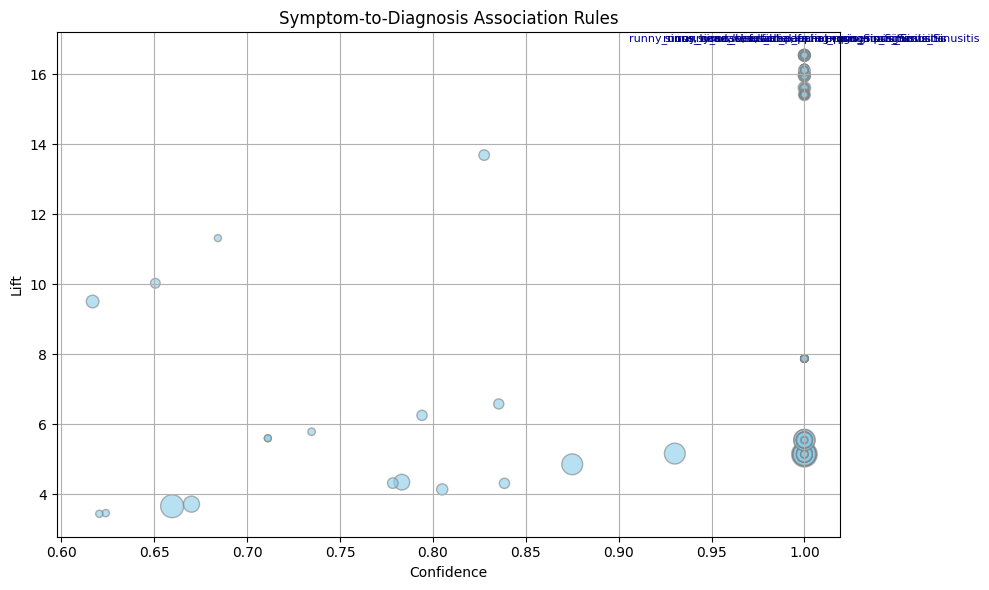

In [35]:
import matplotlib.pyplot as plt

# Plot settings
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    disease_rules['confidence'],
    disease_rules['lift'],
    s=disease_rules['support'] * 2000,  # bubble size
    alpha=0.6,
    c='skyblue',
    edgecolors='gray'
)

plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Symptom-to-Diagnosis Association Rules')
plt.grid(True)

# Annotate top 5 rules
top_rules = disease_rules.sort_values(by='lift', ascending=False).head(5)
for _, row in top_rules.iterrows():
    plt.annotate(
        ', '.join(list(row['antecedents'])) + " → " + ', '.join(list(row['consequents'])),
        (row['confidence'], row['lift']),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        fontsize=8,
        color='darkblue'
    )

plt.tight_layout()
plt.show()
